# Introduction to Machine Learning With Python

@author Annice <br>

Date: 091421  
Texas A&M University  
BMEN 207

***

<img style = "border-radius: 50%;" src="https://upload.wikimedia.org/wikipedia/en/c/c6/NeoTheMatrix.jpg" height=100, width=200 alt="2020 Porsche 911 Carrera 4S Cabriolet">

<h2>Terminology</h2>
<h3>What is artificial intelligence?!</h3><br>
According to Britannica: The ability of a computer to do do tasks usually done by humans. Examples: Recognizing objects, painting pictures, cleaning a room. <br>
<img style = "border-radius: 10%;" src="obj-recognition.jpg" height=500, width=500 alt="obj-rec">
<h3>What is machine learning?!</h3><br>
It is a branch of artificial intelligence that allows computers to learn patterns from data with minimal interactions with humans.
<img style = "border-radius: 10%;" src="chollet_diagram.png" height=300, width=300 alt="obj-rec">

<h3>Examples of Machine Learning Algorithms</h3>
<br>
<strong>Supervised:</strong>
<br>
You what class each of your data points belong to. For example you have images of cats and dogs and you know which ones are cats and which ones are dogs.
<ul>
    <li>Linear Regression:<br>
            <em>Additional resources: <a href="https://www.youtube.com/watch?v=nk2CQITm_eo&t=380s">StatQuest</a>, 
        <a href="https://machinelearningmastery.com/linear-regression-for-machine-learning/">Machinelearingmastery, </a>
        <a href="http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm">Yale, </a></em>
    </li>
    <li>Support Vector Machines:<br>
    <em>Additional resources: <a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47">Towardsdatascience</a></li>
    <li>Naive Based</li>
    <li>Decision Trees</li>
    <li>K-nearest Neighbords</li>
    <li>Neural Networks</li>
    </ul>
<strong>Unsupervised:</strong>
You have no idea which class every data point belongs to.
<ul>
    <li>K-means Clustering</li>
    <li>Hierarchical Clustering</li>
    <li>DBSCAN</li>
    <li>Neural Networks</li>
    </ul>
<br>
    

<h3>Typical steps in machine learning:</h3>
    <ol>
    <li> Determine your dataset (What is the shape of the dataset, how many samples in each class, how large is it?/ Download, import, or visualize ...)</li>
    <li> Clean your data (Missing? Outliers? Cannot classify? Duplicates?) </li>
    <li> Divide dataset into training and testing data </li>
    <li> Build a model </li>
    <li> Train the model using the training data </li>
    <li> Test the model on test data </li>
    <li> Improve the model (Add data, Augment data, change your model, changing the number of epochs, etc) </li>
    </ol>

****

# Example I: Linear Regression

Description: In the following example we build a machine learning model to find disease progression based on clinical data from diabetic patients.<br>
```**Note: Linear regression is helpful when the relationship between variables and target value is linear.**```
<br>
We have a set of X values X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub>, X<sub>4</sub>, ..., X<sub>n</sub>
For each of these X values we have a corresponding Y value:<br><br>
X<sub>1</sub> -> Y<sub>1</sub> <br>
X<sub>2</sub> -> Y<sub>2</sub><br>
X<sub>3</sub> -> Y<sub>3</sub><br>
X<sub>4</sub> -> Y<sub>4</sub><br>
.<br>
.<br>
.<br>
X<sub>n</sub> -> Y<sub>n</sub>

<h2>Simple Linear Regression</h2><br>
<li>Goal: To predict a target value Y based on X values</li>
    <li>Objective: Find the equation that best predicts Y as a linear function of X values. </li>
    </ul>
Y<sub>exp</sub> = b + M*X

Question: How to find the optimal parameters b and M to fit Y<sub>exp</sub> to our dataset and minimize the error between our expected value and the actual target (min(Y<sub>exp</sub> - Y<sub>Actual</sub>))?

<img style = "border-radius: 10%;" src="regression_mse.png" height=400, width=400>

**Gradient Descent**
<br><br>Gradient descent is an optimization algorithm which is used to find local minima of differential functions. Using gradient descent we iteratively move in the direction of the steepest descent in order to find the optimal parameters. 

<br>Think of a blind-folded man moving down a mountain. Starting from the top, the fastest way to get to the bottom of the mountain is to move in the steepest descent direction.<br>

<img src="gradient_descent.png" width=200>

Please see an example of gradient descent below. Note: If you want to do this example in more details it is uploaded on Canvas under extra exercises.

<em>Medical Cost Personal Datasets</em><br>
source for dataset <a href ="https://www.kaggle.com/mirichoi0218/insurance">Kaggle</a>

<ol>
    <li>Read the dataset</li>
    <li>Visualize the dataset</li>
    <li>Fit a random line to the data</li>
    <li>Define a function to calculate the Mean Squared Error</li>
    <li>Define a function to update weights</li>
    <li>Iterate</li>
</ol>

<em>Step 1. Read the dataset</em>

In [7]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<em>Step 2. Visualize the data</em>

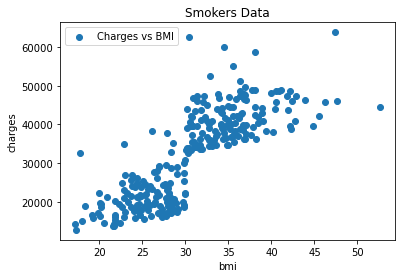

In [8]:
import matplotlib.pyplot as plt
df_smokers = df[df['smoker'].eq('yes')]
plt.scatter(df_smokers['bmi'], df_smokers['charges'], label="Charges vs BMI")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title('Smokers Data')
plt.legend()

<em>Step 3. Fit a random line to our data</em>

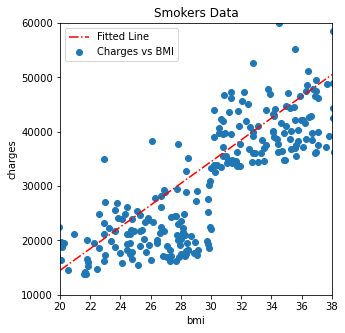

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(20,5))
plt.scatter(df_smokers['bmi'], df_smokers['charges'], label="Charges vs BMI")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title('Smokers Data')
#Let's set the limit for the x and y axes based on the previous plots. 
x0,x1 = 20, 38
y0,y1 = 10_000, 60_000
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)
ax.set_aspect((x1-x0)/(y1-y0))

#Fit a random line to the plot.  
slope=2_000
intercept = -25_500
#so for now we have the fitted line as our model so we can predict insurance charge based on bmi value then try to minimize the mse. 
pred_y0, pred_y1 = (slope*x0 + intercept, slope*x1 + intercept)
ax.plot([x0, x1], [pred_y0, pred_y1], 'r-.', label='Fitted Line')
plt.legend()





<em>Step 4. Define a function to calculate the MSE</em>

In [11]:
import numpy as np
def calculate_mse(X, Y, slope, intercept):
    '''
    Parameters
    ----------
    df : Pandas DataFrame
        A dataframe containing medical data
    slope : float
        slope of the line fitted to data
    intercept: float
        intercept of the line fitted to the data

    Returns
    -------
    float
        The mean squared error
    '''
    X, Y = X.values, Y.values
    #find the difference between the predicted value and the actual value
    diff = (slope * X + intercept) - Y
    #square it and find the average
    mse = np.mean(diff**2) 
    return mse

#Let's take a look at what we just did and calculate the MSE using the defined function.
mse = calculate_mse(df['bmi'], df['charges'], slope, intercept)
print(f"The MSE is {mse}")

The MSE is 745427590.6389842


<em>Step 5. Define a function to update weights</em>

In [12]:
def update_weights(m, b, X, Y, learning_rate):
    '''
    Parameters
    ----------
    m: float
        slope of the line fitted to data
    b: float
        intercept of the line fitted to data
    df : Pandas DataFrame
        A dataframe containing medical data
    learning_rate: float
        learning rate of gradient descent

    Returns
    -------
    float
        It updates the weights of the line fitted to data
    '''
    m_prime , b_prime = 0, 0
    N = len(X)
    #then we should calculate partial derivatives with respect to the slope and intercept. 
    #Our linear model is y=mx+b where m is the slope and b is the intercept. The mean squared error is obtained from (y-(mx+b))^2/N. So 
    #partial derivative with respect to m will be -2x(y - (mx + b)) and with respect to b will be -2(y - (mx + b))
    for i in range(0,len(X)):
        m_prime += -2*X[i] * (Y[i] - (m*X[i] + b))
        b_prime += -2*(Y[i] - (m*X[i] + b))

    # subtract them from the previous values since the derivatives point in direction of steepest ascent
    m -= (m_prime / N) * learning_rate
    b -= (b_prime / N) * learning_rate

    return m, b

<em>Step 6. Iterate</em>

The slope found from gradient descent is 1839.0564335841598 and the intercept is -24862.381709274185. The MSE is 51916999.59842295


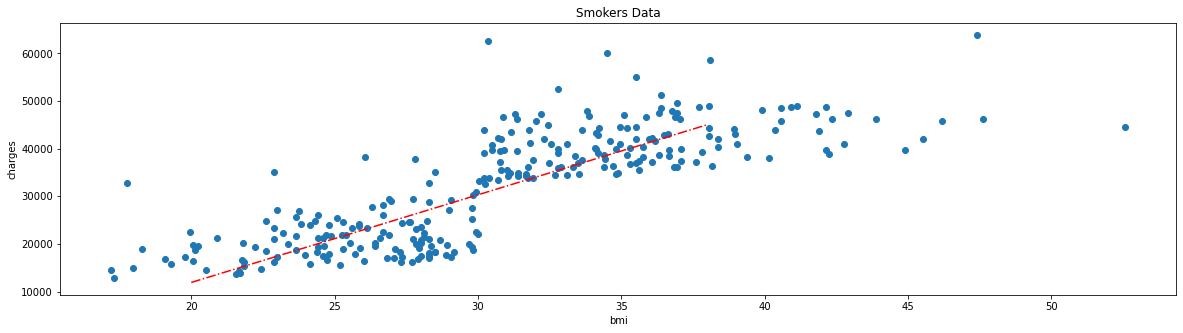

In [13]:
m, b= 2000, -25_000
#let's create a variable to store loss
loss = []
for i in range(0, 150):
  df_smokers.reset_index(inplace=True, drop=True)
  m, b = update_weights(m, b, df_smokers['bmi'], df_smokers['charges'], 0.001)
  mse = calculate_mse(df_smokers['bmi'], df_smokers['charges'], m, b)  
  loss.append(mse)
  
  #Let's set the limit for the x and y axes based on the previous plots. 
  x0,x1 = 20, 38
  y0,y1 = 10_000, 60_000
  ax.set_xlim(x0, x1)
  ax.set_ylim(y0, y1)
  ax.set_aspect((x1-x0)/(y1-y0))

  slope = m
  intercept = b
  pred_y0, pred_y1 = (slope*x0 + intercept, slope*x1 + intercept)
#Plot the last iteration
fig, ax = plt.subplots(1, 1, figsize=(20,5))
plt.scatter(df_smokers['bmi'], df_smokers['charges'], label="Charges vs BMI")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title('Smokers Data')
ax.plot([x0, x1], [pred_y0, pred_y1], 'r-.', label='Fitted Line')  
print(f"The slope found from gradient descent is {m} and the intercept is {b}. The MSE is {mse}")

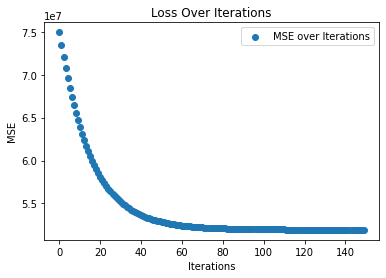

In [15]:
plt.scatter(range(0, 150), loss, label="MSE over Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title('Loss Over Iterations')
plt.legend()

In [16]:
#Now Let's do the same thing using the linear regression model from Sklearn
from sklearn.linear_model import LinearRegression
#Initialize a Linear regression model
lin_reg = LinearRegression()
#fit the model to our data
lin_reg.fit(df_smokers['bmi'].values.reshape([-1, 1]), df_smokers['charges'].values)
#extract the slope and intercept from the model
reg_slope, reg_intercept = lin_reg.coef_[0], lin_reg.intercept_
#calculate the mean squared error
min_mse = calculate_mse(df['bmi'], df['charges'], reg_slope, reg_intercept)
print(f"The minimum MSE is {min_mse} and the slope and intercept are {reg_slope} and {reg_intercept} respectively")

The minimum MSE is 534252858.3466372 and the slope and intercept are 1473.106254701421 and -13186.576322762947 respectively


****

# Diabetes Example

<h2>Multivariate Linear Regression</h2>
<ul><li>Goal: To predict a target value Y based on a set of X values</li>
    <li>Objective: Find the equation that best predicts Y as a linear function of X values. </li>
    </ul>
Y<sub>exp</sub> = a + b<sub>1</sub>X<sub>1</sub>+b<sub>2</sub>X<sub>2</sub>+b<sub>3</sub>X<sub>3</sub>+...

**Reminder**
    <ol>
    <li> Determine your dataset (What is the shape of the dataset, how many samples in each class, how large is it?/ Download, import, or visualize ...)</li>
    <li> Clean your data (Missing? Outliers? Cannot classify? Duplicates?) </li>
    <li> Divide dataset into training and testing data </li>
    <li> Build a model </li>
    <li> Train the model using the training data </li>
    <li> Test the model on test data </li>
    <li> Improve the model (Add data, Augment data, change your model, changing the number of epochs, etc) </li>
    </ol>

<h3>Step I: Determine your dataset (What is the shape of the dataset, how large is it?/ Download, import, or visualize ...)</h3>

In [17]:
#import dataset
#Dataset is the diabetes dataset from the sklearn module
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [18]:
#Question: What type of data does this look like? 
#Answer: dictionary

In [19]:
#Get info about the dataset
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [20]:
#Let's try getting the feature names from the dictionary
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [21]:
#Okay... Now let's extract our data
data = diabetes['data']
target = diabetes['target']

In [22]:
#Now that we have imported the dataset, let's look at the shape of our dataset
print(data.shape)
#Your turn print the shape of the target
print(target.shape)

(442, 10)
(442,)


In [23]:
#Do you mind if we use Pandas a little bit? 
#import pandas
import pandas as pd

In [24]:
#convert data into a dataframe
df = pd.DataFrame(data)
#add the target value
df['target'] = target
#rename columns
new_cols = diabetes['feature_names'] + ["target"]
df.columns = new_cols

In [25]:
#Let's take a look at the df
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [26]:
#Use the describe function to look at the distribution of each column
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


<h3>Step II: Clean your data (Missing? Outliers? Cannot classify? Duplicates?)</h3>

In [27]:
#Check for duplicates
dups = len(df[df.duplicated()])
if dups ==0:
    print("No duplicates")

No duplicates


In [28]:
#Let's check if we have any missing values?!
data_sum = np.sum(data)
data_nan = np.isnan(data_sum)
print("No missing values were found.") if not data_nan else print("Missing values were found.")

No missing values were found.


<h3> Step III: Divide dataset into training and testing data</h3>

<em>Method I: using Sklearn</em>

In [29]:
#split using the train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [30]:
len(X_train)/len(data)

0.7986425339366516

In [31]:
len(X_train)

353

<em>Method II: Do it manually on your Pandas df</em>

In [32]:
#first shuffle your dataframe
from sklearn.utils import shuffle
df = shuffle(df)
#reset the index
df.reset_index(inplace=True, drop=True)

In [33]:
train = df[0:(round(0.8*len(df)))]
test = df[(round(0.8*len(df))):len(df)]

In [34]:
test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
354,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015998,-0.013504,121.0
355,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019908,0.011349,173.0
356,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000609,-0.050783,170.0
357,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628,233.0
358,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015567,0.056912,185.0
438,-0.056370,-0.044642,-0.011595,-0.033214,-0.046975,-0.047660,0.004460,-0.039493,-0.007979,-0.088062,190.0
439,0.074401,0.050680,-0.020218,0.045972,0.074108,0.032819,-0.036038,0.071210,0.106354,0.036201,241.0
440,-0.049105,-0.044642,0.004572,0.011544,-0.037344,-0.018537,-0.017629,-0.002592,-0.039810,-0.021788,200.0


<h3> Step IV: Build a model </h3>

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
model = linear_model.LinearRegression()

<h3>Step V: Train the model using the training data</h3>

In [37]:
model.fit(train[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']], train[['target']])

LinearRegression()

<h3>Step VI: Test the model using the test dataset</h3>

In [38]:
Y_pred = model.predict(test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])

<h3>Step VI: Evaluate model </h3>

In [39]:
print(f"The model coefficients are {model.coef_} and the model intercept is {model.intercept_}")

The model coefficients are [[ -23.92046099 -268.60075407  561.76219401  273.22660583 -893.9889391
   579.48025227  140.88053807  159.97395894  776.90906586   87.3714758 ]] and the model intercept is [151.64750103]


In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [41]:
Y_pred[0:5]

array([[171.13307799],
       [200.07710475],
       [100.08625468],
       [258.23994949],
       [121.30509818]])

In [42]:
test[0:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
354,-0.005515,-0.044642,0.023973,0.008101,-0.034592,-0.038892,0.022869,-0.039493,-0.015998,-0.013504,121.0
355,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019908,0.011349,173.0
356,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000609,-0.050783,170.0
357,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628,233.0
358,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357,64.0


<a href=https://scikit-learn.org/stable/modules/classes.html#regression-metrics>How do I evaluate my model?</a>

In [43]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['target'], Y_pred)

43.48687791835326

Note: Scikit-learn has a detailed documentation on linear regression and functions you can use to train and evaluate a model
    <a href="https://scikit-learn.org/stable/modules/classes.html#regression-metrics">Click here to see!</a>

****

# Neural Networks

<h2>Terminology</h2><br>
Deep Learning Definition:
<ul>
    <li>A machine learning model that uses a neural networks for learning patterns in data</li></ul>
<br>
Neural Network:<br>
    <ul><li>Network or circuit of neurons (nodes)</li></ul>

<h4>Neuron?!</h4>

A neuron is the basic unit of neural networks. It always receives inputs, does some calculations and outputs a value. 
<img src="neuron_rep.png" height= 400 width=400>
Inputs get multipled by weights
<img src="calc.png" height= 200 width=200>
The values will be added + some bias
<img src="calc_2.png" height= 300 width=300>
The sum of the results will go through an activation function
<img src="calc_3.png" height= 350 width=350>
One example of an activation function is ```sigmoid``` which gives turns the result of the previous step to a value between 0 and 1. The sigmoid function is also known as a logistic function.
<img src="calc_4.png" height= 350 width=350>
<strong>Simple Neural Network</strong>
<img src="neural_net_simple.png" height= 350 width=350>
<h6><em>Reference of images: <a href="https://victorzhou.com/blog/intro-to-neural-networks/">Victor Zhou's blog</a><em></h6>

# Example: Classifying Handwritten Numbers 

Reference: Deep learning By Python book (Francois Chollet)

In [44]:
#if you don't have tensorflow installed
'''
!pip intsall tensorflow
'''
import tensorflow as tf

In [45]:
mnist = tf.keras.datasets.mnist

Description of dataset: It is a dataset consisting of handwritten digits 0-9 of sizes 28x28

**Reminder**
<ol>
    <li> Determine your dataset (What is the shape of the dataset, how large is it?/ Download, import, or visualize ...)</li>
    <li> Clean your data (Missing? Outliers? Cannot classify? Duplicates?) </li>
    <li> Divide dataset into training and testing data </li>
    <li> Build a model </li>
    <li> Train the model using the training data </li>
    <li> Test the model on test data </li>
    <li> Improve the model (Add data, Augment data, change your model) </li>
    </ol>

In [46]:
#import the mnist dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [47]:
#Save for reference in case we change the images later
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()

In [48]:
#look at the shape of the training dataset
X_train.shape

(60000, 28, 28)

In [49]:
#let's look at the shape of the test dataset as well
X_test.shape

(10000, 28, 28)

In [50]:
#Let's take a closer look at the dataset
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

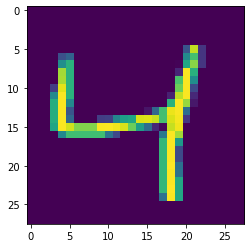

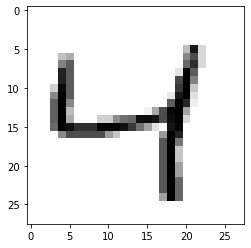

In [51]:
#let's plot handwritten numbers using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()

plt.imshow(X_train[2], plt.cm.binary)
plt.show()

In [52]:
#normalize pixel values from 0 to 255 to 0 to 1.
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

Each data point consists of values between 0 to 255.  After normalization it would be from 0 to 1.

In [53]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [54]:
#build your model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

Relu activation: 
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/42/ReLU_and_GELU.svg">

Softmax Activation: 
    Generalization of the logistic (sigmoid) function. Therefore instead of giving you results for only two classes, it can give you the probability of your result over different classes. 
    <img src="softmax.png" width=400, height=400>

<h3>Optimizer</h3><br>
To make the network ready for training, we need to pick three more things, as part
of the compilation step:<br><ul>
<li> A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.</li>
<li> An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.</li>
<li> Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).</li>
</ul>

In [55]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
'''
RMSProp, is an extension of gradient descent. It uses a decaying average 
of partial gradients for each parameter.
categorical_crossentropy: computes the loss between the labels and predictions. Used for multi-class classification
'''


'\nRMSProp, is an extension of gradient descent. It uses a decaying average \nof partial gradients for each parameter.\ncategorical_crossentropy: computes the loss between the labels and predictions. Used for multi-class classification\n'

In [56]:
#reshape images
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [57]:
#convert labels to categorical
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [58]:
#extract the history of validation and accuracy loss over epochs
history = model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3024 - accuracy: 0.6695
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5346 - accuracy: 0.8558
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4073 - accuracy: 0.8854
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3579 - accuracy: 0.8977
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3304 - accuracy: 0.9058


In [59]:
#evaluate loss and accuracy on test data
val_loss, val_acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.9106


In [60]:
#let's see the keys from history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


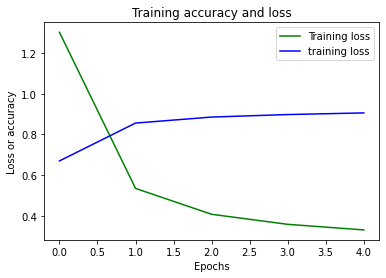

In [61]:
#plot validation loss and accuracy
acc_train = history.history['accuracy']
loss_train = history.history['loss']
epochs = range(0,5)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, acc_train, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel('Loss or accuracy')
plt.legend()
plt.show()

In [62]:
#save the model
model.save('number_classifier.model')

INFO:tensorflow:Assets written to: number_classifier.model/assets


In [63]:
#load the model
model = tf.keras.models.load_model('number_classifier.model')

In [64]:
#predict the test labels
preds = model.predict([X_test])

In [65]:
#print predictions
preds

array([[5.2071864e-06, 4.2051614e-08, 4.2337924e-06, ..., 9.9913752e-01,
        6.1703859e-06, 5.6585582e-04],
       [3.8323991e-04, 2.2511257e-04, 9.9213988e-01, ..., 4.1620627e-09,
        1.1288491e-03, 9.3179784e-09],
       [8.7789675e-07, 9.9547184e-01, 2.4085504e-03, ..., 2.9822584e-04,
        5.6461245e-04, 5.1468865e-05],
       ...,
       [3.1062757e-07, 2.8044886e-05, 4.5796671e-05, ..., 2.4602634e-03,
        3.1879190e-03, 7.6654747e-02],
       [6.2413616e-03, 1.4513241e-04, 3.4338885e-04, ..., 1.0330250e-04,
        2.1394287e-01, 2.6677089e-04],
       [9.3767565e-04, 5.3265232e-08, 1.7720064e-03, ..., 2.7580836e-07,
        6.5948088e-06, 1.3241441e-06]], dtype=float32)

In [66]:
#let's look at one image
preds[0]

array([5.2071864e-06, 4.2051614e-08, 4.2337924e-06, 2.7757656e-04,
       4.2477570e-08, 3.2833361e-06, 1.0990883e-09, 9.9913752e-01,
       6.1703859e-06, 5.6585582e-04], dtype=float32)

In [67]:
print(np.argmax(preds[0]))

7


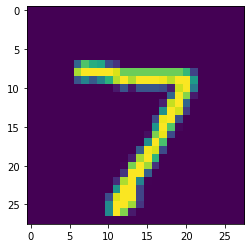

In [68]:
plt.imshow(test_img[0])
plt.show()

Seems like it matches the actual handwritten drawing :))

# Test on your own handwriting

In [74]:
from PIL import Image
file_name = "six.png"
my_img = Image.open(file_name).convert('L')
my_img = np.invert(my_img)
my_data = np.asarray(my_img)

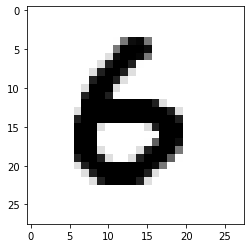

In [75]:
plt.imshow(my_img, plt.cm.binary)

In [76]:
my_data = my_data.reshape((1, 28 * 28))
my_data = my_data.astype('float32') / 255

In [77]:
model.predict([my_data])

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [78]:
np.argmax(model.predict(my_data))

8

Fall 2021 <br>
Texas A&M University <br>
Texas, **==